VEHICLE PREDICTION
END TO END ML Lifecycle
. Understanding the Business Problem
. Data Collection
. Data Checks to perform/Data Validation
. Exploratory Data Analysis
. Data Pre-Processing
. Model Training
. Model Validation
. Save Model File
. Integrate with the front End API
. Deploy Model on cloud  

1) Problem Statement :
   This dataset is used to predict the price of the cars based on the below given columns :
        •	name
        •	year
        •	selling_price
        •	km_driven
        •	fuel
        •	seller_type
        •	transmission
        •	Owner

2) Data Collection : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data
   Dataset contain 4340 * 8 (rows*columns)



Import required Packages and Datasets   

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [95]:
# import the csv file for data 
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [96]:
# Get top 5 records
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [97]:
# Shape of datasets
df.shape

(4340, 8)

In [98]:
#DataSet information
###Categorical Feature:
# Seller Type : ['Individual' 'Dealer' 'Trustmark Dealer']
#fuel :['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
#transmission : ['Manual' 'Automatic']
#owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner' 'Test Drive Car']
# name of car
####Numeric feature:
#year
#selling price --> laebl/prediction feature
# km driven

print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [99]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### There is no missing value in the dataset

### 3.2 Check Duplicates

In [100]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


### There are 763 duplicated records which is data issue and is legit reason as there are multiple cars with similar data points

In [101]:
# Check Null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Check the Unique value of the categorical column to decide the encoding strategy of those columns       

In [102]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

### Exploring Data

In [103]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [104]:
print("categories in the fuel type variable:  ",end=" ")
print(df['fuel'].unique())

print("categories in the seller type variable:  ",end=" ")
print(df['seller_type'].unique())

print("categories in the transmission type variable:  ",end=" ")
print(df['transmission'].unique())

print("categories in the owner type variable:  ",end=" ")
print(df['owner'].unique())

categories in the fuel type variable:   ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
categories in the seller type variable:   ['Individual' 'Dealer' 'Trustmark Dealer']
categories in the transmission type variable:   ['Manual' 'Automatic']
categories in the owner type variable:   ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### Creating the variable # of Years of Vehichal to analyze the relationship with the selling price of the same 

In [105]:
final_df=df[['year', 'km_driven', 'fuel', 'seller_type','transmission', 'owner','selling_price']]
final_df.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [106]:
final_df['Current Year']=2024
final_df.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price,Current Year
0,2007,70000,Petrol,Individual,Manual,First Owner,60000,2024
1,2007,50000,Petrol,Individual,Manual,First Owner,135000,2024
2,2012,100000,Diesel,Individual,Manual,First Owner,600000,2024
3,2017,46000,Petrol,Individual,Manual,First Owner,250000,2024
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000,2024


In [107]:
final_df['Vehicle_Age']=final_df['Current Year']- final_df['year']
final_df.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price,Current Year,Vehicle_Age
0,2007,70000,Petrol,Individual,Manual,First Owner,60000,2024,17
1,2007,50000,Petrol,Individual,Manual,First Owner,135000,2024,17
2,2012,100000,Diesel,Individual,Manual,First Owner,600000,2024,12
3,2017,46000,Petrol,Individual,Manual,First Owner,250000,2024,7
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000,2024,10


In [108]:
final_df.drop(['year','Current Year'],axis=1,inplace=True)
final_df.head()

,km_driven,fuel,seller_type,transmission,owner,selling_price,Vehicle_Age
0,70000,Petrol,Individual,Manual,First Owner,60000,17
1,50000,Petrol,Individual,Manual,First Owner,135000,17
2,100000,Diesel,Individual,Manual,First Owner,600000,12
3,46000,Petrol,Individual,Manual,First Owner,250000,7
4,141000,Diesel,Individual,Manual,Second Owner,450000,10


### Checking the relationship between Target Variable and the Independent variable
### Convert the Categorical variable into numeric variable to analyze the relationship between the Dependent and Independent variable

In [109]:
final_df=pd.get_dummies(final_df,dtype=int,drop_first=True)
final_df.head()

,km_driven,selling_price,Vehicle_Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,60000,17,0,0,0,1,1,0,1,0,0,0,0
1,50000,135000,17,0,0,0,1,1,0,1,0,0,0,0
2,100000,600000,12,1,0,0,0,1,0,1,0,0,0,0
3,46000,250000,7,0,0,0,1,1,0,1,0,0,0,0
4,141000,450000,10,1,0,0,0,1,0,1,0,1,0,0


### Getting understanding of the corelation between the depedent & Independent variable

In [110]:
final_df.corr()

,km_driven,selling_price,Vehicle_Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
km_driven,1.000000,-0.192289,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
selling_price,-0.192289,1.000000,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
Vehicle_Age,0.419688,-0.413922,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.285396,0.282947,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.001372,-0.005095,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.036652,-0.042434,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.291139,-0.269453,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,0.182663,-0.236798,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,-0.089858,0.110176,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,0.120226,-0.530205,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


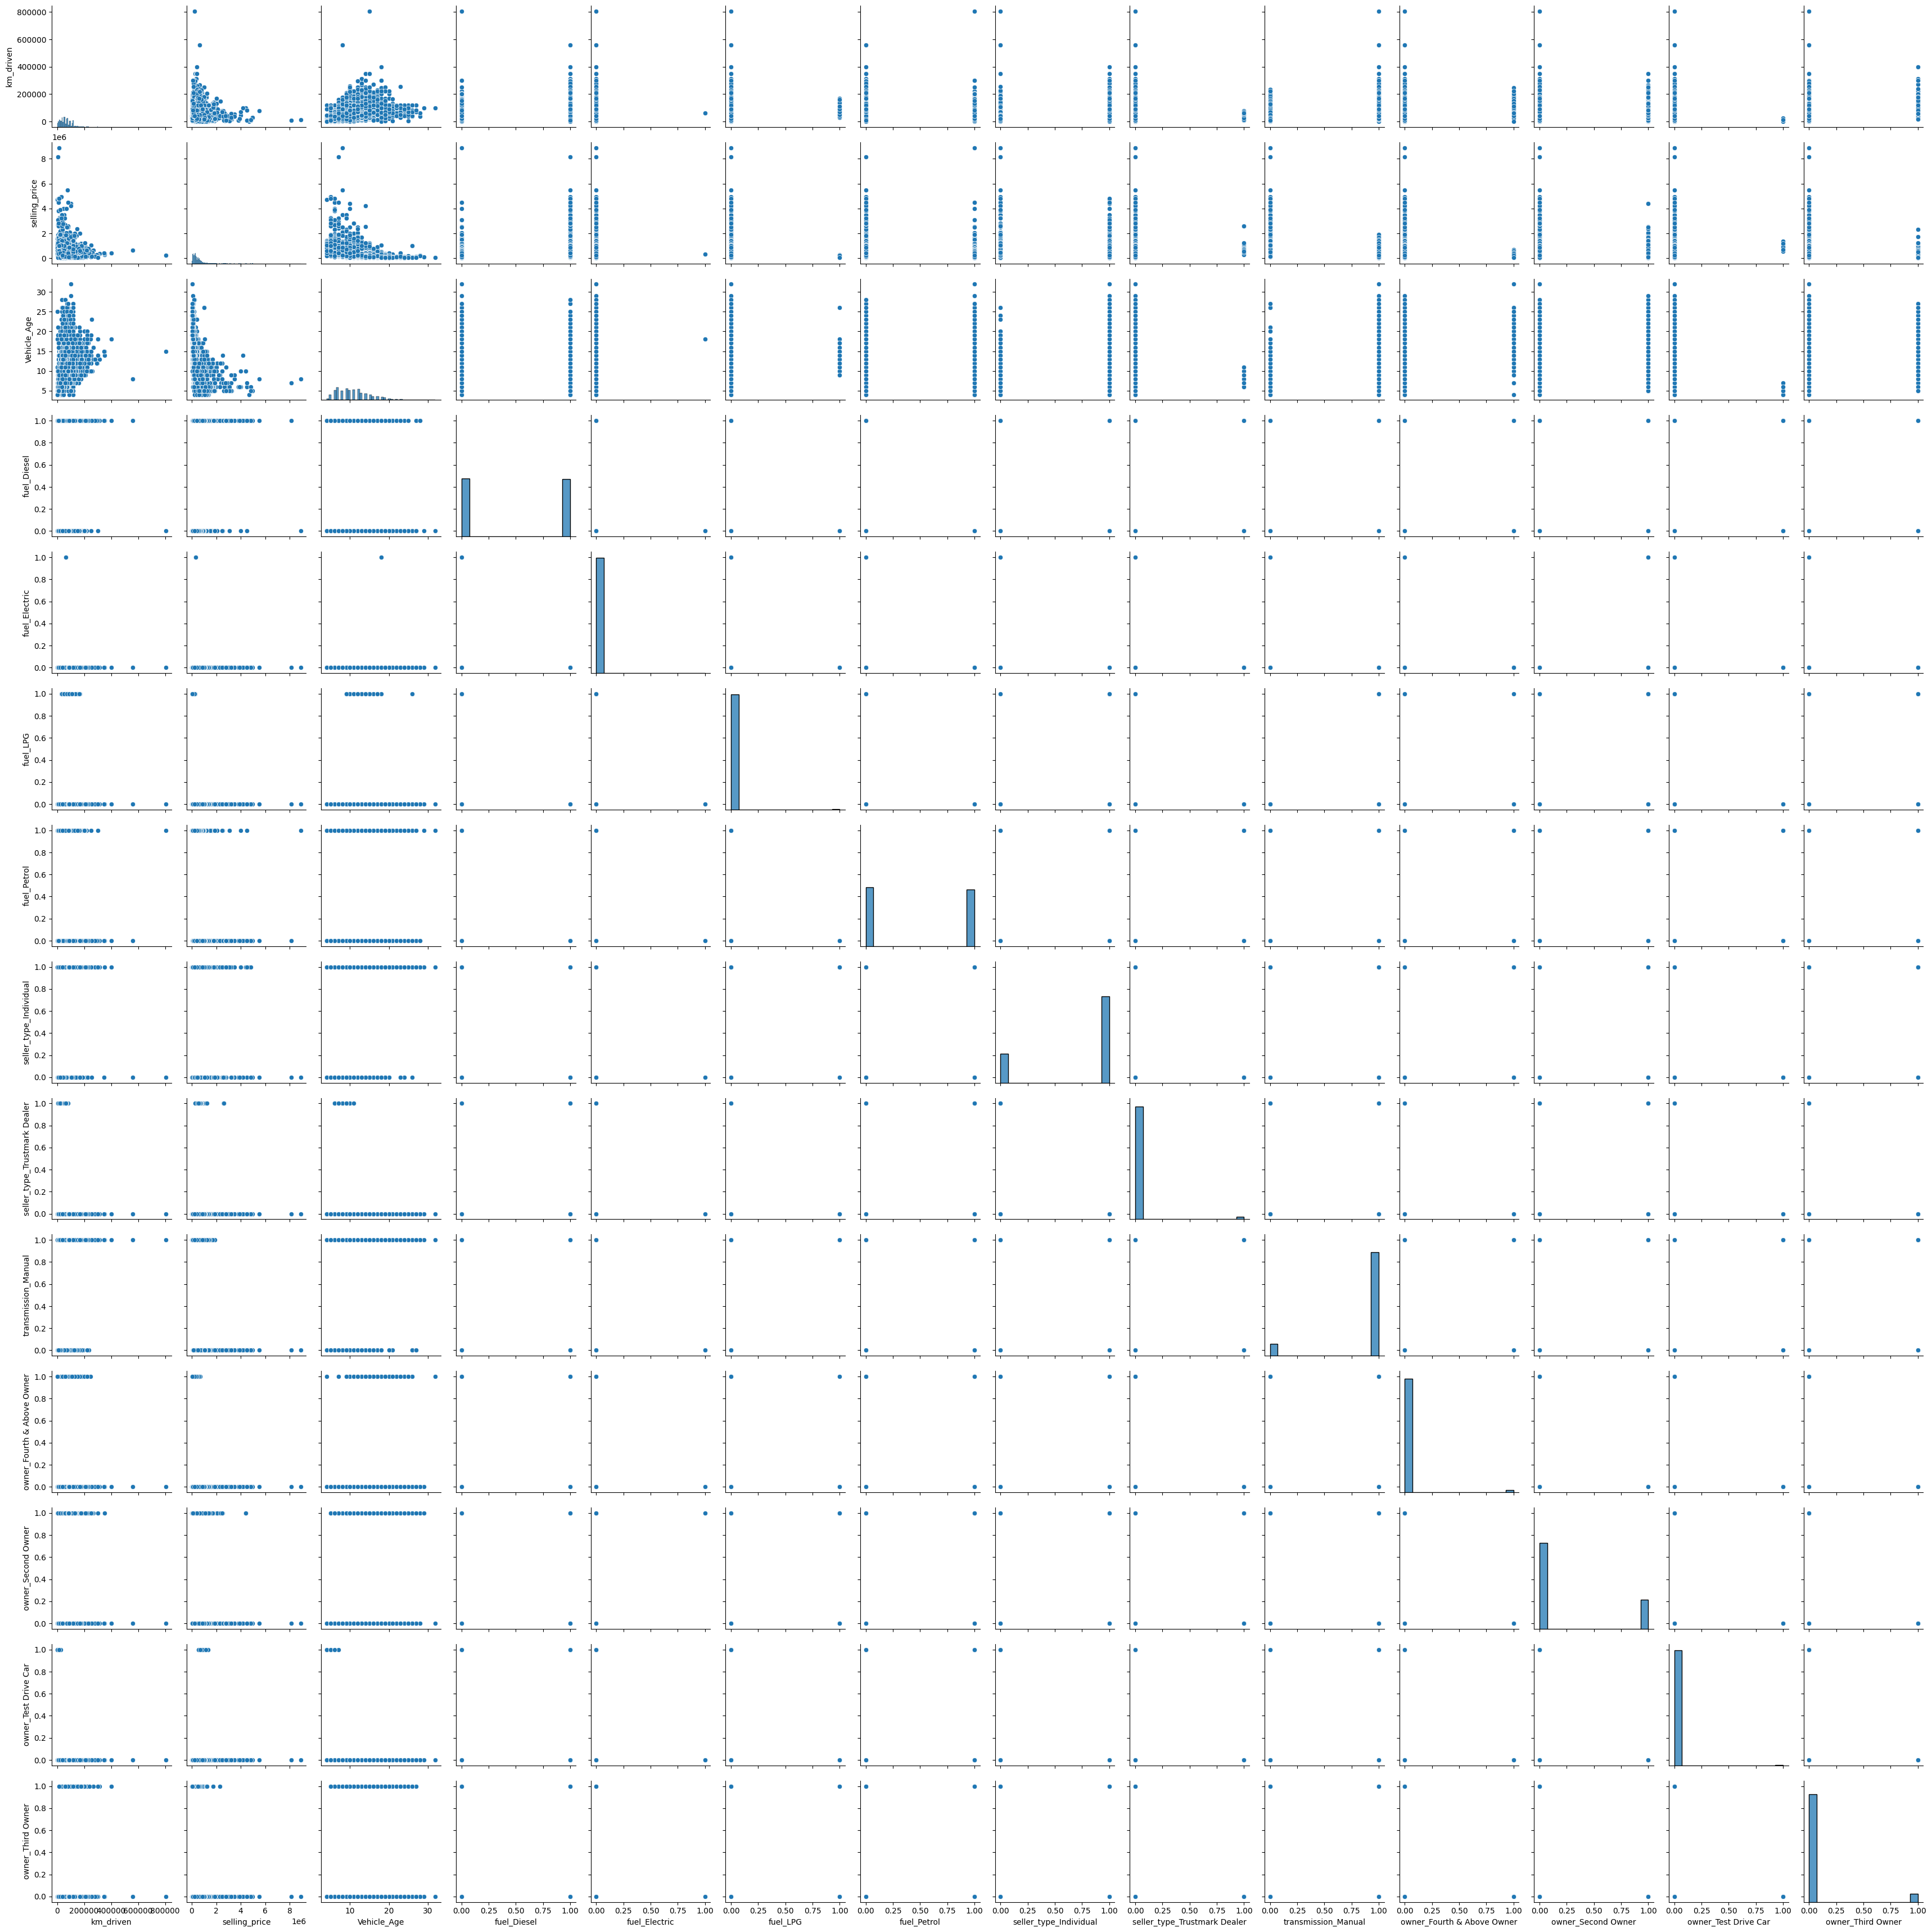

In [111]:
sns.pairplot(final_df)

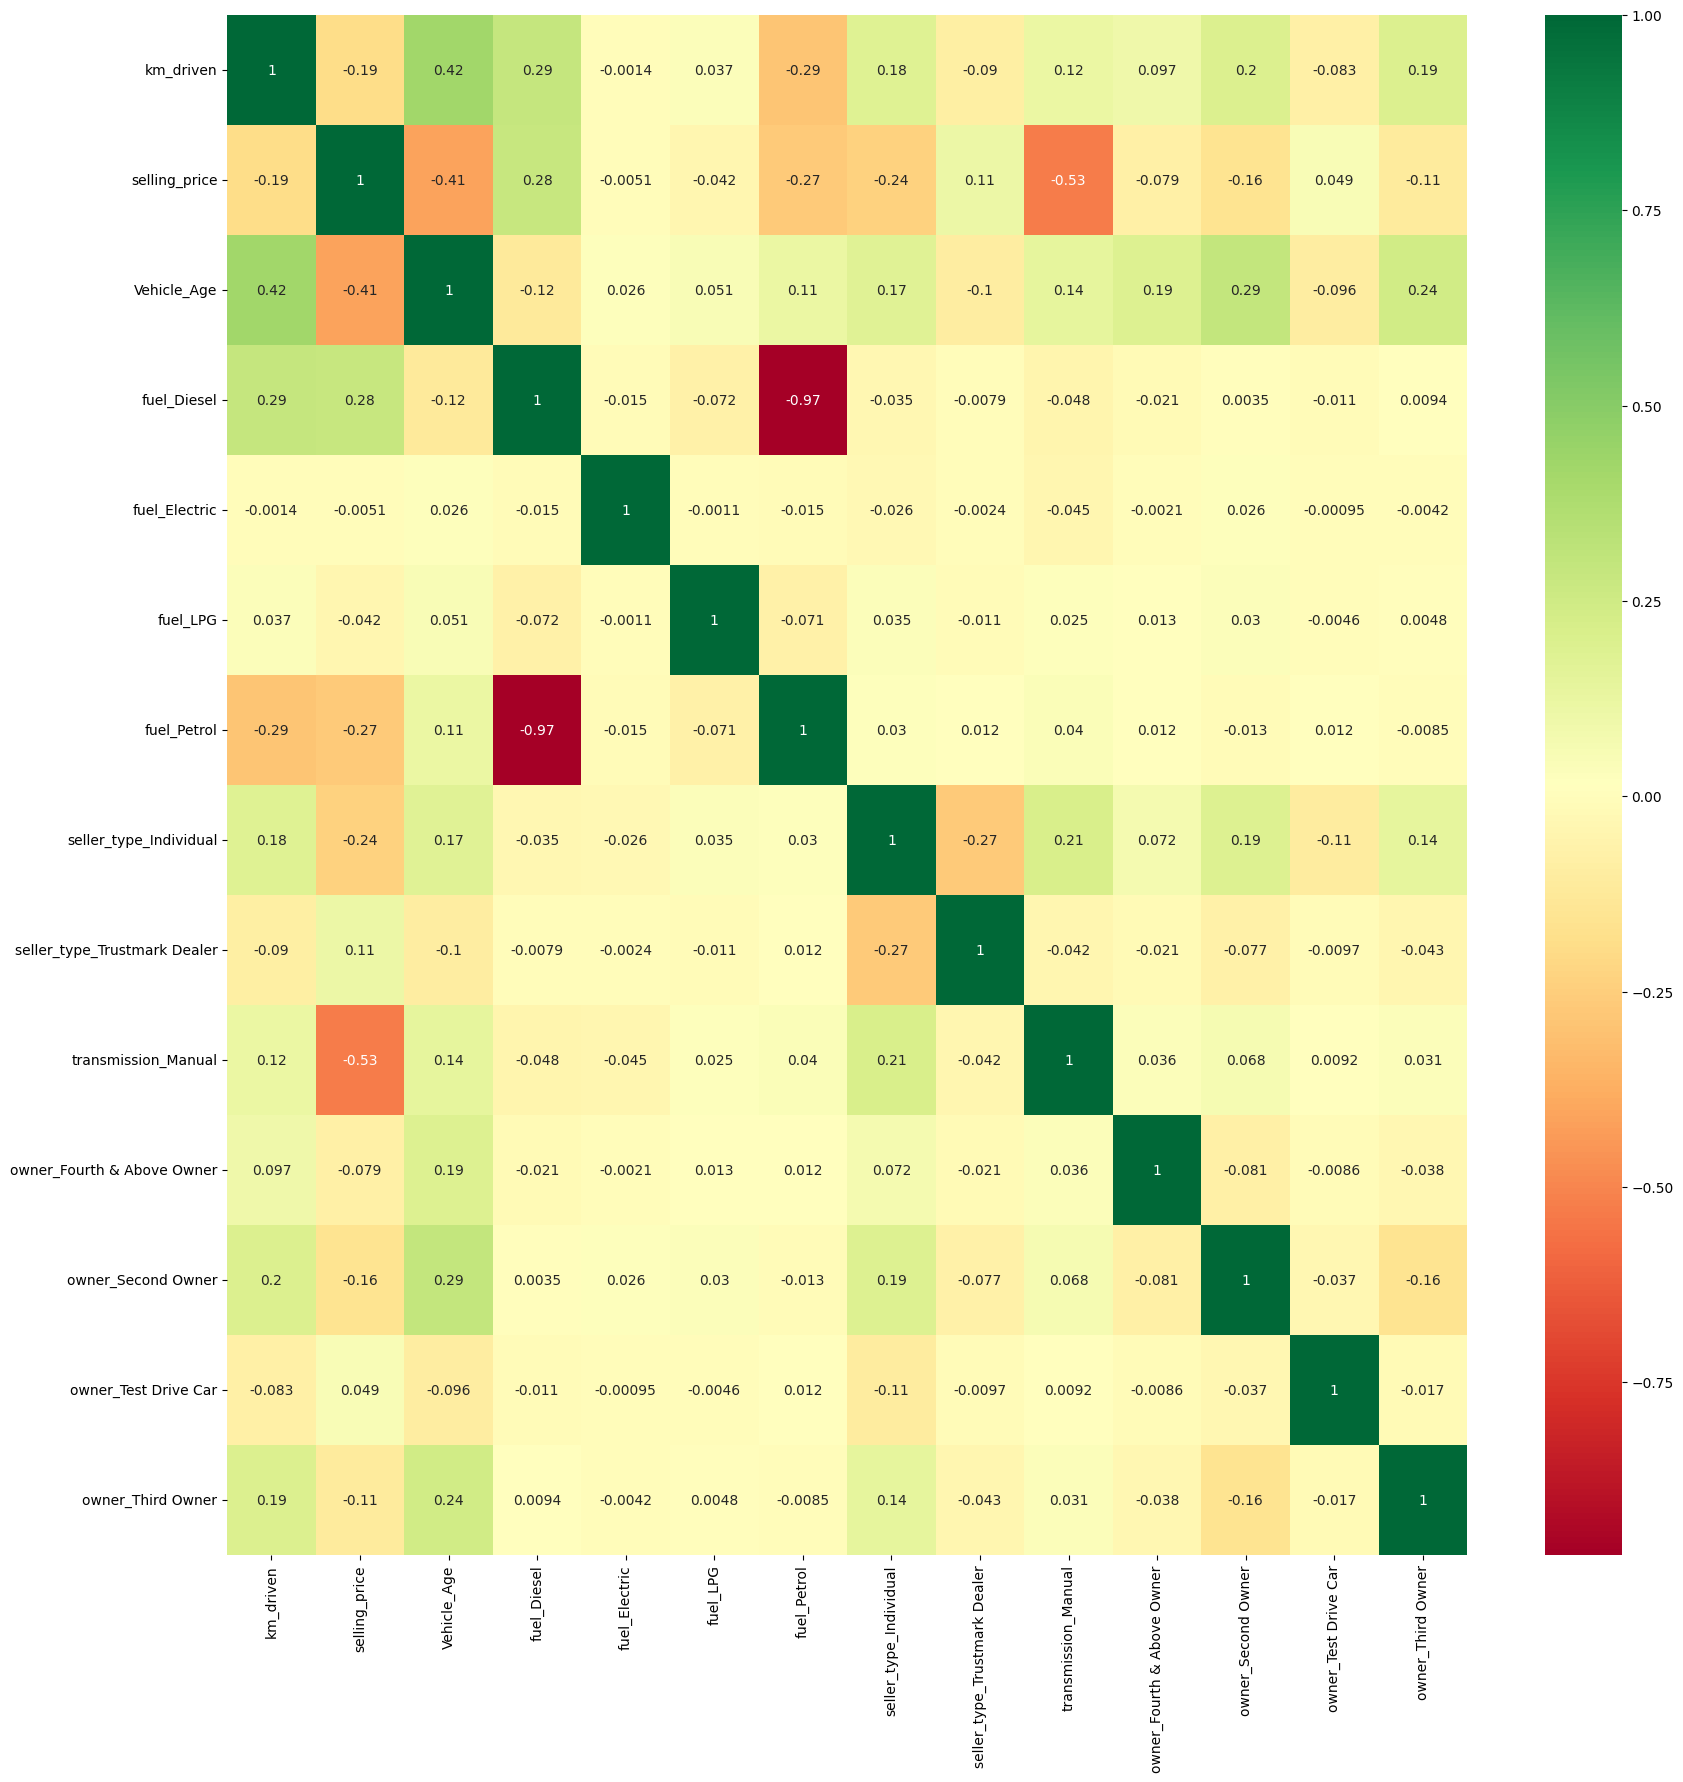

In [112]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### There is somewhat relation between 
     **selling price Vs Transmission Automatic(positive co -related 53%)
     **selling price Vs Transmission Manual(negative co -related 53%)
     **selling price vs Age of Vehicle(Postive co-related 49%)